In [188]:
import sys
import sklearn
import numpy as np
import pandas as pd
import os
import matplotlib as mpl
import matplotlib.pyplot as plt

assert sys.version_info >= (3, 5)
assert sklearn.__version__ >= "0.20"

np.random.seed(42)

%matplotlib inline
mpl.rc('axes', labelsize=14, axisbelow=True)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [189]:
PROJECT_ROOT_DIR = '.'
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, 'images', 'titanic')

os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_name, tight_layout=True, fig_extension='png', resolution = 300):
    path = os.path.join(IMAGES_PATH, fig_name + ',' + fig_extension)
    print('Saving figure: ', fig_name)
    if tight_layout:
        plt.tight_layout()
    
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Download data

In [190]:
import urllib.request

DOWNLOAD_URL = 'https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/titanic/'
DATASET_PATH = os.path.join(PROJECT_ROOT_DIR, 'datasets', 'titanic')

def fetch_titanic_data(url=DOWNLOAD_URL, path=DATASET_PATH):
    if not os.path.isdir(path):
        os.makedirs(path)
        
    for filename in ('train.csv', 'test.csv'):
        filepath = os.path.join(path, filename)
        if not os.path.isfile(filepath):
            print('Downloading file:', filename)
            urllib.request.urlretrieve(url + filename, filepath)

In [191]:
fetch_titanic_data()

## Read data

In [192]:
def load_titanic_data(filename):
    path = os.path.join(DATASET_PATH, filename)
    return pd.read_csv(path)

In [193]:
train_data = load_titanic_data('train.csv')
test_data = load_titanic_data('test.csv')

In [194]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [195]:
train_data = train_data.set_index('PassengerId')
test_data = test_data.set_index('PassengerId')

## Discover and Visualize the Data to Gain Insights

### Look at data

In [196]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


Features:
- **Survived** - 0 = No; 1 = Yes
- **Pclass (Passenger Class)** - 1 = 1st; 2 = 2nd; 3 = 3rd
- **Name**
- **Sex** - male; female
- **Age**
- **SibSp** - Number of Siblings/Spouses Aboard
- **Parch** - Number of Parents/Children Aboard
- **Ticket** - Ticket Number
- **Fare** - Passenger Fare
- **Cabin**
- **Embarked (Port of Embarkation)** - C = Cherbourg; Q = Queenstown; S = Southampton

In [197]:
train_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699113,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526507,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.416700,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


NB:
- **Age** - some values are NaN, so we can fill in median instead
- **Ticket** - not so important. Remove
- **Name** - not so important. Remove
- **Cabin** - not so important and a lot of values are NaN. Remove
- **Sex** - can be translated into binary categories.
- **Sex** - can be translated into spare matrix.

### Visualizing Geographical Data

In [198]:
train_data_vis = train_data.copy()

In [199]:
sex_survived = train_data_vis.groupby(['Sex', 'Survived']).size().unstack()
sex_survived

Survived,0,1
Sex,,
female,81,233
male,468,109


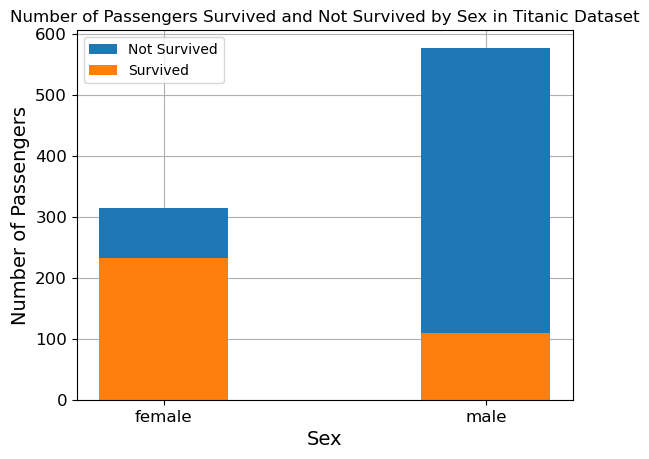

In [200]:
sex_labels = sex_survived.index.tolist()
survived_counts = sex_survived[1].tolist()
not_survived_counts = sex_survived[0].tolist()

plt.grid()
plt.bar(sex_labels, not_survived_counts, bottom=survived_counts, width=0.4, label='Not Survived')
plt.bar(sex_labels, survived_counts, width=0.4, label='Survived')
plt.xlabel('Sex')
plt.ylabel('Number of Passengers')
plt.title("Number of Passengers Survived and Not Survived by Sex in Titanic Dataset")
plt.legend()
plt.show()

In [201]:
train_data_vis['age_cat'] = pd.cut(train_data_vis['Age'], bins=[-0., 10, 20, 30, 40, 50, 60, 70, 80, np.inf], labels=["0-10", "10-20", "20-30", "30-40", "40-50", "50-60", "60-70", "70-80", ">80"])

train_data_vis['age_cat'].value_counts().sort_index()

age_cat
0-10      64
10-20    115
20-30    230
30-40    155
40-50     86
50-60     42
60-70     17
70-80      5
>80        0
Name: count, dtype: int64

In [202]:
age_cat_survived = train_data_vis.groupby(['age_cat', 'Survived'], observed=True).size().unstack()
age_cat_survived

Survived,0,1
age_cat,,
0-10,26,38
10-20,71,44
20-30,146,84
30-40,86,69
40-50,53,33
50-60,25,17
60-70,13,4
70-80,4,1


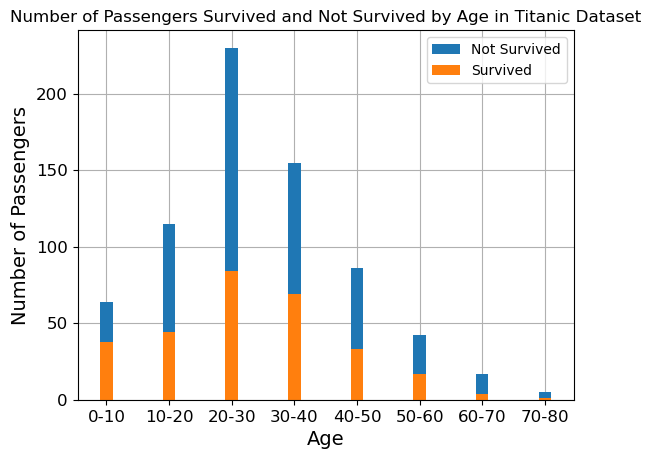

In [203]:
age_labels = age_cat_survived.index.tolist()
survived_counts = age_cat_survived[1].tolist()
non_survived_counts = age_cat_survived[0].tolist()

plt.grid()
plt.bar(age_labels, non_survived_counts, bottom=survived_counts, width=0.2, label="Not Survived")
plt.bar(age_labels, survived_counts, width=0.2, label="Survived")
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.title("Number of Passengers Survived and Not Survived by Age in Titanic Dataset")
plt.legend()

In [204]:
class_survived = train_data_vis.groupby(['Pclass', 'Survived']).size().unstack()
class_survived

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


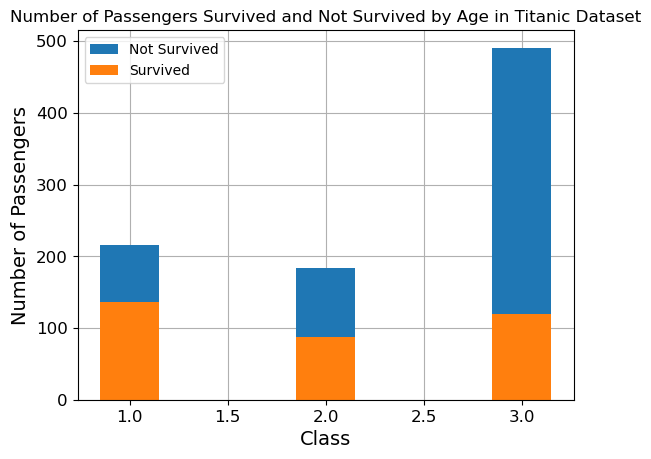

In [205]:
class_labels = class_survived.index.tolist()
survived_counts = class_survived[1].tolist()
non_survived_counts = class_survived[0].tolist()

plt.grid()
plt.bar(class_labels, non_survived_counts, bottom=survived_counts, width=0.3, label="Not Survived")
plt.bar(class_labels, survived_counts, width=0.3, label="Survived")
plt.xlabel('Class')
plt.ylabel('Number of Passengers')
plt.title("Number of Passengers Survived and Not Survived by Age in Titanic Dataset")
plt.legend()

In [206]:
train_data_vis['is_child'] = pd.cut(train_data_vis['Age'], bins=[-0., 16, np.inf], labels=["Child (<16 yrs)", "Not Child"])
train_data_vis['is_child'].value_counts()

is_child
Not Child          614
Child (<16 yrs)    100
Name: count, dtype: int64

In [207]:
is_child_survived = train_data_vis.groupby(['is_child', 'Survived'], observed=True).size().unstack()
is_child_survived

Survived,0,1
is_child,,
Child (<16 yrs),45,55
Not Child,379,235


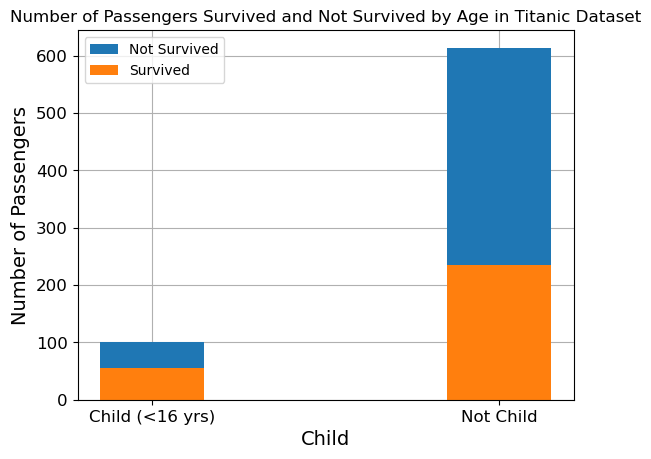

In [208]:
is_child_labels = is_child_survived.index.tolist()
survived_counts = is_child_survived[1].tolist()
non_survived_counts = is_child_survived[0].tolist()

plt.grid()
plt.bar(is_child_labels, non_survived_counts, bottom=survived_counts, width=0.3, label="Not Survived")
plt.bar(is_child_labels, survived_counts, width=0.3, label="Survived")
plt.xlabel('Child')
plt.ylabel('Number of Passengers')
plt.title("Number of Passengers Survived and Not Survived by Age in Titanic Dataset")
plt.legend()

### Looking for Correlations

In [209]:
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [210]:
str_attribs = ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
train_num = train_data.drop(str_attribs, axis=1)

corr_matrix = train_num.corr()
corr_matrix

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096066
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096066,0.159651,0.216225,1.000000


In [211]:
corr_matrix["Survived"].sort_values(ascending=False)

Survived    1.000000
Fare        0.257307
Parch       0.081629
SibSp      -0.035322
Age        -0.077221
Pclass     -0.338481
Name: Survived, dtype: float64

array([[<Axes: xlabel='Survived', ylabel='Survived'>,
        <Axes: xlabel='Pclass', ylabel='Survived'>,
        <Axes: xlabel='Age', ylabel='Survived'>,
        <Axes: xlabel='SibSp', ylabel='Survived'>,
        <Axes: xlabel='Parch', ylabel='Survived'>,
        <Axes: xlabel='Fare', ylabel='Survived'>],
       [<Axes: xlabel='Survived', ylabel='Pclass'>,
        <Axes: xlabel='Pclass', ylabel='Pclass'>,
        <Axes: xlabel='Age', ylabel='Pclass'>,
        <Axes: xlabel='SibSp', ylabel='Pclass'>,
        <Axes: xlabel='Parch', ylabel='Pclass'>,
        <Axes: xlabel='Fare', ylabel='Pclass'>],
       [<Axes: xlabel='Survived', ylabel='Age'>,
        <Axes: xlabel='Pclass', ylabel='Age'>,
        <Axes: xlabel='Age', ylabel='Age'>,
        <Axes: xlabel='SibSp', ylabel='Age'>,
        <Axes: xlabel='Parch', ylabel='Age'>,
        <Axes: xlabel='Fare', ylabel='Age'>],
       [<Axes: xlabel='Survived', ylabel='SibSp'>,
        <Axes: xlabel='Pclass', ylabel='SibSp'>,
        <Axes: xla

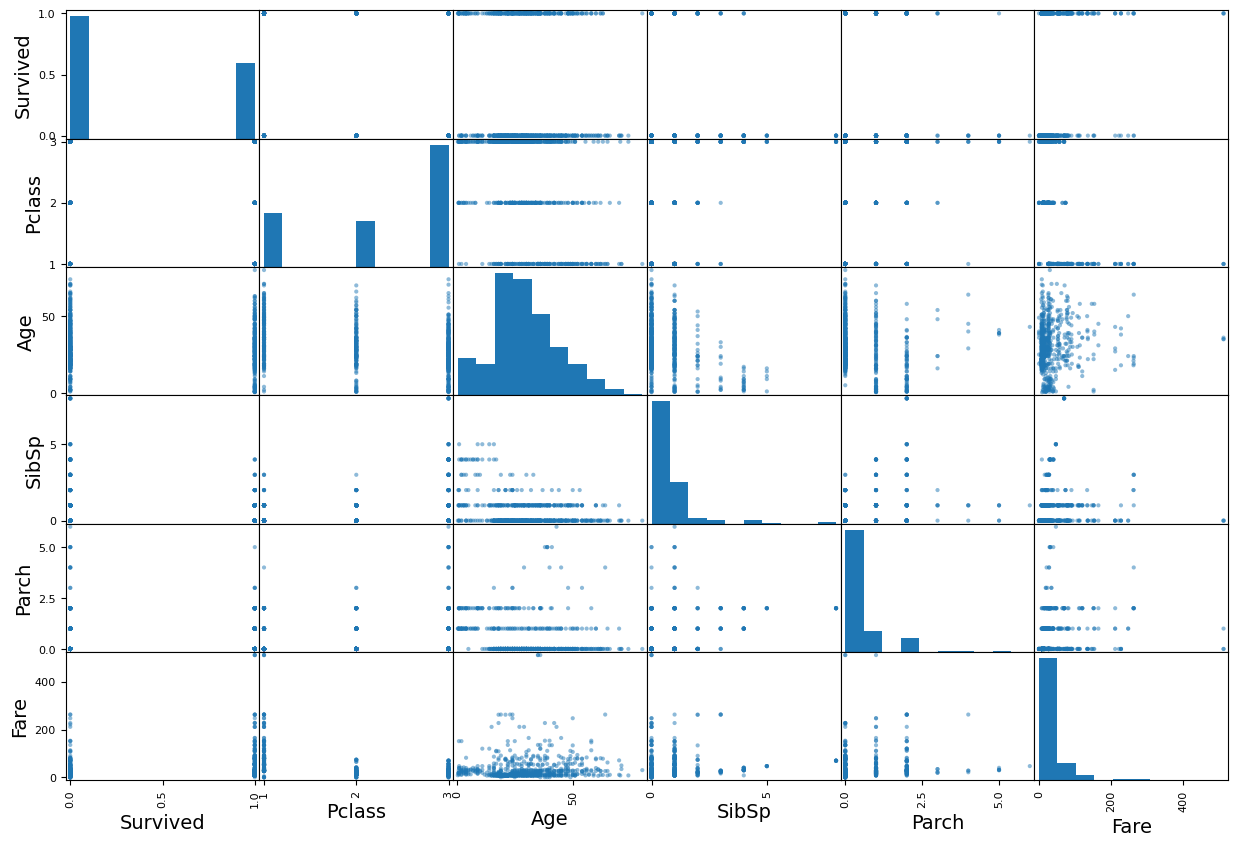

In [212]:
from pandas.plotting import scatter_matrix

scatter_matrix(train_data.drop(str_attribs, axis=1), figsize=(15, 10))

## Transform data

In [213]:
from sklearn.base import BaseEstimator, TransformerMixin

def column_to_index(columns):
    data_cols = list(train_data.columns)
    return [data_cols.index(col) for col in columns]


class DropColumns(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):        
        return np.delete(X, column_to_index(['Name', 'Ticket', 'Cabin']), axis=1)

In [214]:
from sklearn.pipeline import Pipeline

drop_pipline = Pipeline([
    ('drop_columns', DropColumns())
])

In [215]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler()),
])

In [216]:
from sklearn.preprocessing import OneHotEncoder

cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("cat_encoder", OneHotEncoder(sparse=False)),
])

In [217]:
train_data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [218]:
from sklearn.compose import ColumnTransformer

num_attribs = ["Age", "SibSp", "Parch", "Fare"]
cat_attribs = ["Pclass", "Sex", "Embarked"]
all_attribs = list(train_data.columns)

preprocess_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs),
])
# drop_pipeline just doesn't work

In [219]:
X_train = preprocess_pipeline.fit_transform(train_data[num_attribs + cat_attribs])
X_train

C:\Users\Admin\anaconda3\envs\untitled\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[-0.56573582,  0.43279337, -0.47367361, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.6638609 ,  0.43279337, -0.47367361, ...,  1.        ,
         0.        ,  0.        ],
       [-0.25833664, -0.4745452 , -0.47367361, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.10463705,  0.43279337,  2.00893337, ...,  0.        ,
         0.        ,  1.        ],
       [-0.25833664, -0.4745452 , -0.47367361, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.20276213, -0.4745452 , -0.47367361, ...,  0.        ,
         1.        ,  0.        ]])

In [220]:
Y_train = train_data['Survived']

In [221]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
forest_clf.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [222]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_clf, X_train, Y_train, cv=10)
forest_scores.mean()

0.8137578027465668

In [223]:
from sklearn.svm import SVC

svm_clf = SVC(gamma='auto')
svm_scores = cross_val_score(svm_clf, X_train, Y_train, cv=10)
svm_scores.mean()

0.8249313358302123

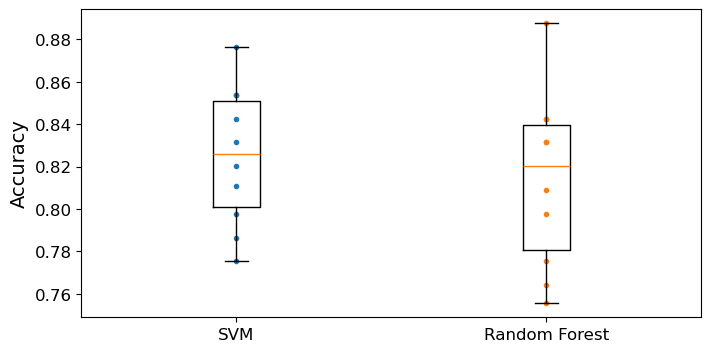

In [224]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot([1]*10, svm_scores, ".")
plt.plot([2]*10, forest_scores, ".")
plt.boxplot([svm_scores, forest_scores], labels=("SVM","Random Forest"))
plt.ylabel("Accuracy", fontsize=14)
plt.show()